# CAPSTONE 1 -  MACHINE LEARNING MODELS

This project has 6 quantitative features with a single target containing 2 classes, Normal and Abnormal



0 = Normal of which there are 209 total  
1 = Abnormal of which there are 100 total

30% of the data is stratisfied into a test set due to the unbalanced nature of the set

Resampling is performed with both ADASYN and SMOTE, SMOTE preferred due to the sparse distribution of the minority class, however, not knowing the desired recall balance or bias, ADASYN may be preferred to ensure extreme precision for Normal or Abnormal bias.

Accuracy is measured and compared on the Recall, Precision, and F1, along with plots of ROC and confusion matrix

A summary of the results allows for selection of the best model dependent on prerred recall.

It was a pleasure tuning these machines, feel free to send comments to my email:  mconsultant@protonmail.com


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Machine modeling tools
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN, SMOTE

# Scoring
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,recall_score

#### Import data variables

In [18]:
X = pd.read_csv('Data/X.csv')         ## 6 Features
Y = np.ravel(pd.read_csv('Data/Y.csv'))       ## Target 'class' 100 abnormal, 209 normal

#### Transform data using Linear Discrimanant Analysis - a Guassian algorithm to improve boundries between colinear features

#### Statisfied train-test split for unbalanced dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                stratify=Y,random_state = 88)    # 30% test set

#### Functions

In [20]:
# Performs GridSearch of multiple parameters on specified resample algorithM
# Returns the optimal parameter set and their corresponding scores

def gridSearchCV(model, param_grid, X_train, X_Test, y_train, y_test, graph = 1,name='none'):
    
    # Scale the features
    std_scale = StandardScaler()
    X_train_scaled = std_scale.fit_transform(X_train)
    X_test_scaled = std_scale.transform(X_test)
    
    # Fold parameters
    kf = KFold(n_splits=5, shuffle=False)
    
    # create pipeline
    resample = SMOTE(random_state=88)
    pipeline = Pipeline([('sampling', resample), ('class', model)])
    
    # perform gridsearch, fit, and predict
    grid = GridSearchCV(pipeline, param_grid, scoring = 'f1', cv = kf)
    grid.fit(X_train_scaled, y_train)
    print("Training score: ",clf.score(X_train, y_train))
    predictions = grid.predict(X_test_scaled)
    
    #Graph ROC
    if graph == 1:
        proba_predict = grid.predict_proba(X_test_scaled)
        preds = proba_predict[:,1]
        plot_ROC(grid, preds, X_test_scaled, y_test, graph=graph)
        
    #Return the classification report results
    report = (classification_report(y_test, predictions, output_dict=True))
    print(classification_report(y_test, predictions))
    
    #Print the parameters
    print("Best Parameters: ", grid.best_params_)
    
    # Plot confusion matrix
    plot_confusion(y_test,predictions)
    
    # Store scores
    df = pd.DataFrame(report).transpose() 
    df.insert(0, "Model", [name, name, name, name, name])
    return df

In [21]:
# Plots the ROC of model

def plot_ROC(model, probs, test_features, test_target, graph = 1):
    if graph == 1:
        print("area under curve (auc): ", metrics.roc_auc_score(y_test, probs))
        fpr, tpr, thresholds = roc_curve(test_target, probs)
        plt.plot([0,1],[0,1], linestyle='--')
        plt.plot(fpr, tpr)
        plt.show()

In [22]:
# Plots confusion matrix of model

def plot_confusion(y_test, pred):
    mat = confusion_matrix(y_test, pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label');

#### Base Measurement without parameter tuning performed on Logistic Regression

area under curve (auc):  0.9613756613756613


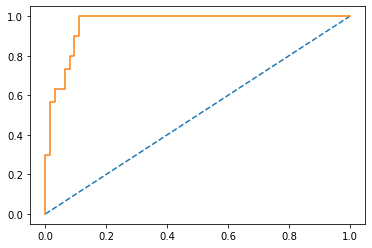

None
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.80      0.80      0.80        30

    accuracy                           0.87        93
   macro avg       0.85      0.85      0.85        93
weighted avg       0.87      0.87      0.87        93



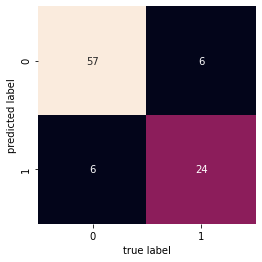

In [23]:
ytrain = np.ravel(y_train) # optimize the shape of y

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, ytrain)
predictions = clf.predict(X_test)
proba = clf.predict_proba(X_test)
probs = proba[:,1]

# Print the accuracy from the testing data.
print(plot_ROC(clf, probs, X_test, y_test))
print(classification_report(y_test, predictions))
plot_confusion(y_test,predictions)

Not bad but a recall that states 20 out of 100 will be incorrectly labeled 

## PARAMETER TUNING

### LOGISTIC REGRESSION

Training score:  0.8425925925925926
area under curve (auc):  0.9523809523809523


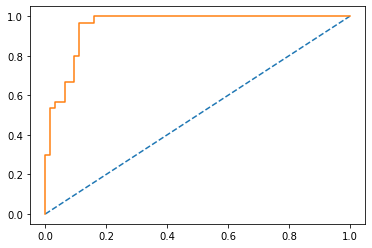

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        63
           1       0.81      0.97      0.88        30

    accuracy                           0.91        93
   macro avg       0.89      0.93      0.91        93
weighted avg       0.93      0.91      0.92        93

Best Parameters:  {'class__C': 10, 'class__penalty': 'l2', 'class__solver': 'newton-cg'}


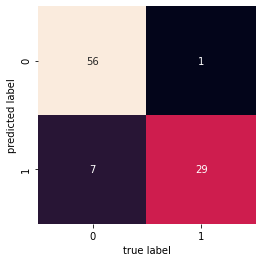

In [24]:
# Test parameter grid for best paramaters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
penalty = ['l2']
c_values = [0.001,0.01,0.1, 1, 10]
random_grid = {'class__solver':solvers,'class__penalty':penalty, 'class__C':c_values}

# Perform GridSearch on parameter grid
summary = gridSearchCV(LogisticRegression(random_state=42),random_grid, 
                       X_train, X_test, y_train, y_test, name='Smote LogReg')

## GRADIENT BOOSTING CLASSIFIER

Training score:  0.8425925925925926
area under curve (auc):  0.9576719576719577


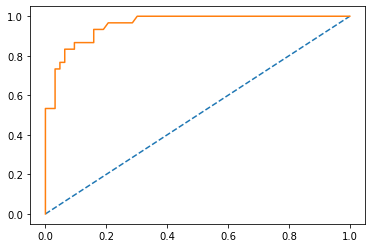

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        63
           1       0.74      0.87      0.80        30

    accuracy                           0.86        93
   macro avg       0.84      0.86      0.85        93
weighted avg       0.87      0.86      0.86        93

Best Parameters:  {'class__criterion': 'friedman_mse', 'class__learning_rate': 0.1, 'class__loss': 'exponential', 'class__n_estimators': 16}


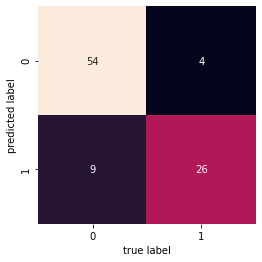

In [25]:
# Test parameter grid for best paramaters
loss = ['deviance', 'exponential']
lr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
ne = range(1,100,5)
cr = ['friedman_mse', 'mse', 'mae']
random_grid = {'class__loss':loss,'class__learning_rate':lr,'class__n_estimators':ne, 'class__criterion':cr}

# Perform GridSearch on parameter grid
df = gridSearchCV(GradientBoostingClassifier(random_state=42), random_grid, 
             X_train, X_test, y_train, y_test, name='Smote GB')
summary = summary.append(df)

## SUPPORT VECTOR MACHINE

Training score:  0.8425925925925926
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        63
           1       0.74      0.87      0.80        30

    accuracy                           0.86        93
   macro avg       0.84      0.86      0.85        93
weighted avg       0.87      0.86      0.86        93

Best Parameters:  {'class__C': 1000, 'class__gamma': 0.01, 'class__kernel': 'rbf'}


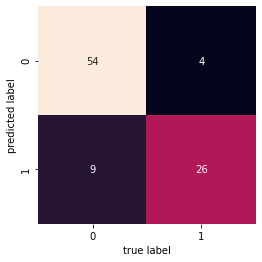

In [26]:
param_grid = {'class__C': [0.1, 1, 10, 100, 1000],  
              'class__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'class__kernel': ['rbf']}  

df = gridSearchCV(SVC(random_state=42), param_grid, 
             X_train, X_test, y_train, y_test, graph=2,name='Smote SVM')
summary = summary.append(df)

## RANDOM FOREST CLASSIFIER

Training score:  0.8425925925925926
area under curve (auc):  0.9513227513227513


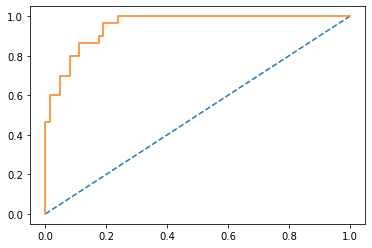

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.76      0.87      0.81        30

    accuracy                           0.87        93
   macro avg       0.85      0.87      0.86        93
weighted avg       0.88      0.87      0.87        93

Best Parameters:  {'class__criterion': 'gini', 'class__max_depth': 6, 'class__min_samples_leaf': 1, 'class__n_estimators': 16}


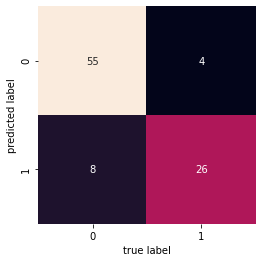

In [27]:
param_grid = {'class__n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200], 
              'class__max_depth': range(1,32,1),
              'class__min_samples_leaf': [1, 2, 3, 4, 5], 
              'class__criterion': ['gini', 'entropy']}  

df = gridSearchCV(RandomForestClassifier(random_state=42), param_grid, 
             X_train, X_test, y_train, y_test, name='Smote RF')
summary = summary.append(df)

## KNEIGHBORS CLASSIFIER

#### Base Measure without tuning

Training score:  0.8425925925925926
area under curve (auc):  0.888095238095238


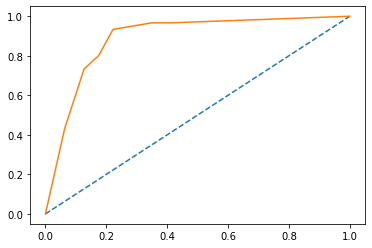

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        63
           1       0.69      0.80      0.74        30

    accuracy                           0.82        93
   macro avg       0.79      0.81      0.80        93
weighted avg       0.83      0.82      0.82        93

Best Parameters:  {'class__algorithm': 'auto', 'class__leaf_size': 1, 'class__n_neighbors': 6, 'class__p': 2, 'class__weights': 'uniform'}


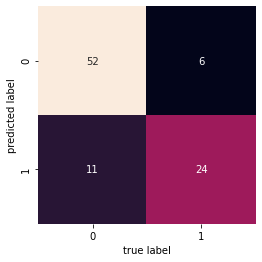

In [28]:
param_grid = {'class__algorithm': ['auto'], 
              'class__leaf_size': [1,5,10,15,20,25,30], 
             'class__n_neighbors':[1,2,3,4,5,6,7,8],
             'class__p':[1,2],
             'class__weights':['uniform','distance']}  

df = gridSearchCV(KNeighborsClassifier(), param_grid, 
                  X_train, X_test, y_train, y_test, name='Smote KNN')
summary = summary.append(df)

### Gaussian Naive Bayes

Training score:  0.8425925925925926
area under curve (auc):  0.8873015873015873


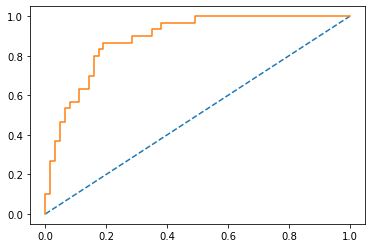

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        63
           1       0.63      0.87      0.73        30

    accuracy                           0.80        93
   macro avg       0.78      0.81      0.78        93
weighted avg       0.83      0.80      0.80        93

Best Parameters:  {'class__var_smoothing': 0.1}


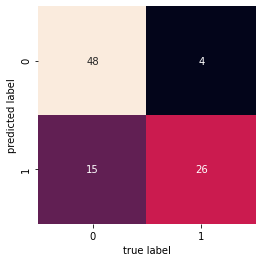

In [29]:
param_grid = {'class__var_smoothing':[1e-1,1e-9,1e-19,1e-29]}
df = gridSearchCV(GaussianNB(priors=None, ), param_grid, 
                  X_train, X_test, y_train, y_test, name='Smote NB')
summary = summary.append(df)

In [30]:
print(summary)

                     Model  precision    recall  f1-score    support
0             Smote LogReg   0.982456  0.888889  0.933333  63.000000
1             Smote LogReg   0.805556  0.966667  0.878788  30.000000
accuracy      Smote LogReg   0.913978  0.913978  0.913978   0.913978
macro avg     Smote LogReg   0.894006  0.927778  0.906061  93.000000
weighted avg  Smote LogReg   0.925391  0.913978  0.915738  93.000000
0                 Smote GB   0.931034  0.857143  0.892562  63.000000
1                 Smote GB   0.742857  0.866667  0.800000  30.000000
accuracy          Smote GB   0.860215  0.860215  0.860215   0.860215
macro avg         Smote GB   0.836946  0.861905  0.846281  93.000000
weighted avg      Smote GB   0.870332  0.860215  0.862703  93.000000
0                Smote SVM   0.931034  0.857143  0.892562  63.000000
1                Smote SVM   0.742857  0.866667  0.800000  30.000000
accuracy         Smote SVM   0.860215  0.860215  0.860215   0.860215
macro avg        Smote SVM   0.836